### Ch11 Figure1

In [1]:
%load_ext rpy2.ipython

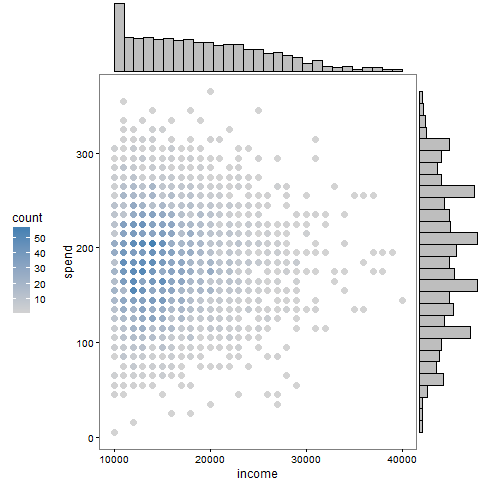

In [2]:
%%R
require(dplyr)

df = read.csv('csv_output/ch11_fig1.csv')

df$income.cut = df$income %>% cut(21, breaks=c(9:50)*1000, labels=FALSE)
f = as.factor(df$income.cut)
levels(f) <- c(10:50)*1000
df$income = as.numeric(as.character(f))
df$spend.cut = df$spend %>% cut(21, breaks=c(.5:40) * 10, labels=FALSE)
f = as.factor(df$spend.cut)
levels(f) <- c(.5:40) * 10
df$spend = as.numeric(as.character(f))

dgb = df %>% group_by(income, spend)
df2 = summarize(dgb, count=n())

require(ggplot2)
p = ggplot(df2, aes(income, spend)) + geom_point(aes(colour = count), size=3) + scale_colour_gradient(low='lightgrey', high='steelblue') + theme_bw() + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), legend.position='left')
ggExtra::ggMarginal(p, type = "histogram", bins=30)
# ggsave("svg_output/ch11_fig3.svg")